In [1]:
# Import libraries
import pandas as pd
import numpy as np
import sqldf
from sklearn.model_selection import train_test_split
import category_encoders as ce

In [2]:
#Defining the Path
file_path = r'C:\Users\vaibhav.bodhe\OneDrive - Inteliment Technologies India Pvt. Ltd\DESKTOP\2_filter.csv'

In [3]:
#Reading the Data
df = pd.read_csv(file_path)

In [4]:
#Converting Date attributes date_time
df['srch_ci']=pd.to_datetime(df['srch_ci'])
df['srch_co']=pd.to_datetime(df['srch_co'])
df['date_time']=pd.to_datetime(df['date_time'])

In [5]:
#Extracting month from checkin date and date_time of user event
df['check_in_month']=df['srch_ci'].apply(lambda x:x.month)
df['date_time_month']=df['date_time'].apply(lambda x:x.month)

In [6]:
df=df.drop(columns=['is_booking'])

In [7]:
#-------------------------EDA-----------------------#

<Axes: xlabel='hotel_continent', ylabel='count'>

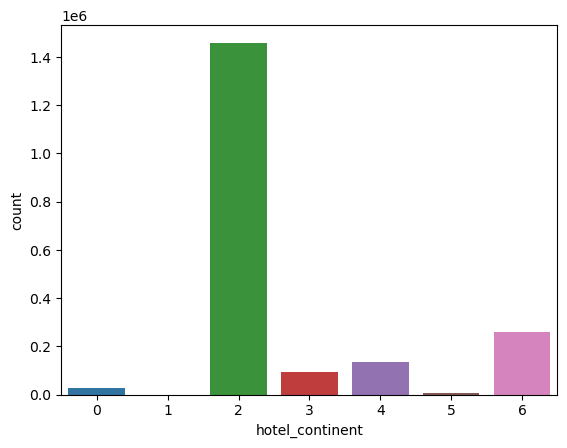

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='hotel_continent', data=df)

<Axes: >

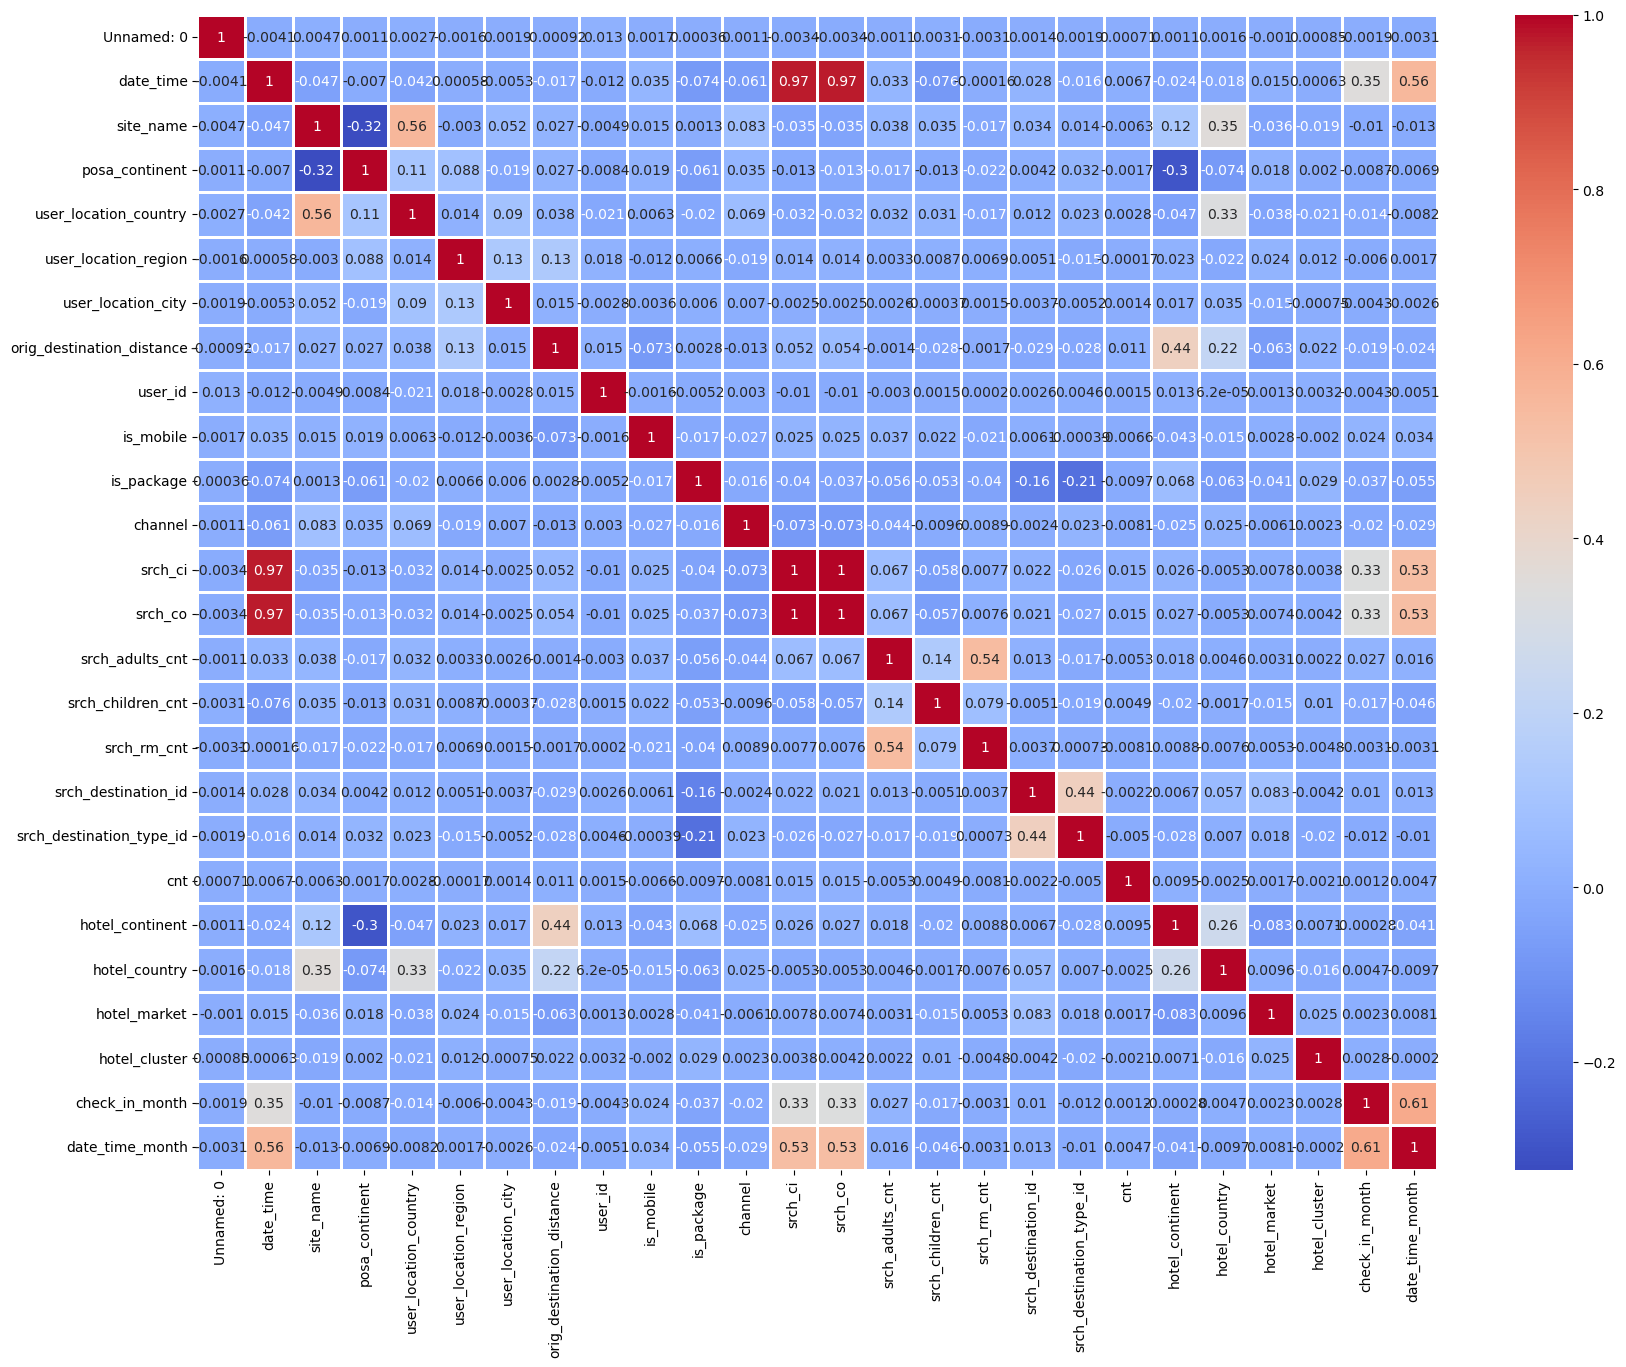

In [9]:
fig, ax=plt.subplots()
fig.set_size_inches(20,15)
sns.heatmap(df.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

<Axes: xlabel='hotel_cluster', ylabel='count'>

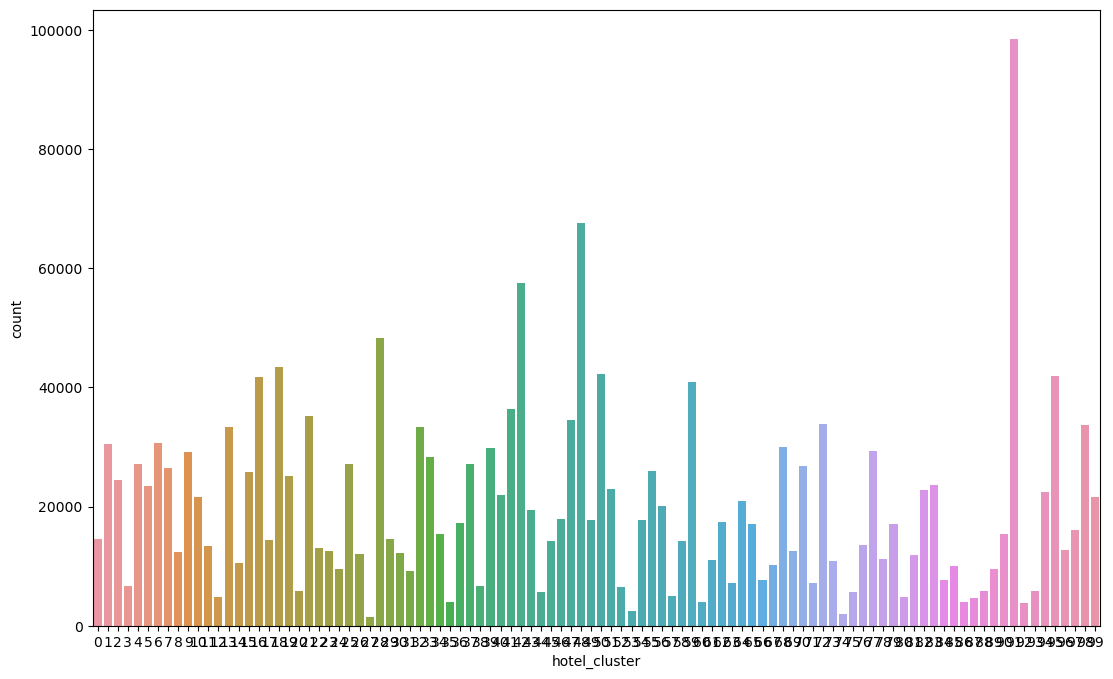

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x='hotel_cluster',data=df, ax=ax)

<Axes: xlabel='is_package', ylabel='count'>

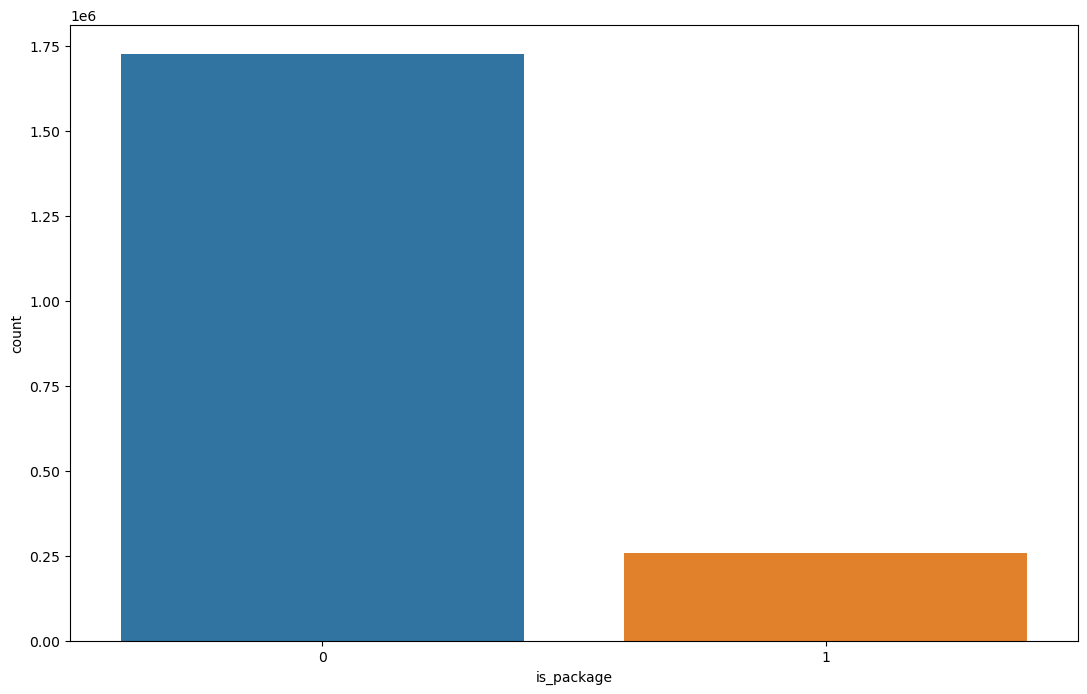

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x='is_package',data=df, order=[0,1], ax=ax)

In [12]:
#Calculating the days Spent Columns
df['time_delta']=(df['srch_co']-df['srch_ci'])
df['days_spent']=df['time_delta'].dt.days
df=df.drop(columns=['time_delta'])

In [13]:
df=pd.DataFrame(df)

In [14]:
#Dropping unnecessary Columns
df=df.drop(columns=['user_id']) #--user_id
df=df.drop(columns=['date_time'])#--date_time 
df=df.drop(columns=['srch_ci']) #--Check_in
df=df.drop(columns=['srch_co']) #--Check_out
df=df.drop(columns=['cnt']) #--User_event_count
df=df.drop(columns=['Unnamed: 0']) #--Generated Column

In [15]:
df.head()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,is_mobile,is_package,channel,srch_adults_cnt,...,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market,hotel_cluster,check_in_month,date_time_month,days_spent
0,2,3,66,348,48862,2234.2641,0,1,9,2,...,1,8250,1,2,50,628,1,8,8,4
1,2,3,66,462,41898,2454.8588,0,1,1,3,...,2,12009,1,2,50,680,95,2,1,5
2,2,3,66,462,41898,2454.8588,0,1,1,2,...,1,12009,1,2,50,680,95,2,1,5
3,2,3,66,462,41898,2454.8588,0,1,1,2,...,1,12009,1,2,50,680,95,2,1,3
4,2,3,66,174,40365,8456.8294,0,0,0,2,...,2,1571,3,3,5,89,38,11,10,1


In [22]:
#Target encoding the Categorical Variables
# Assuming 'target' is your target variable, replace it with your actual target variable name
target = df['hotel_cluster']

# List of categorical columns
categorical_columns = [
     'site_name', 'posa_continent', 'user_location_country',
    'user_location_region', 'user_location_city',
    'channel', 'srch_destination_id', 'srch_destination_type_id',
    'hotel_continent', 'hotel_country', 'hotel_market','check_in_month','date_time_month'
]

# Step 1: Split the dataset into training and validation/test sets
train_df, val_test_df, train_target, val_test_target = train_test_split(df, target, test_size=0.1, random_state=42)

# Step 2: Specify all categorical columns and calculate the mean of the target variable
encoder = ce.TargetEncoder(cols=categorical_columns)
train_df_encoded = encoder.fit_transform(train_df, train_target)

# Step 3: Map the means back to the original data for the validation/test set
val_test_df_encoded = encoder.transform(val_test_df)

# Print the encoded columns for the training and validation/test sets
print(train_df_encoded[categorical_columns])
print(val_test_df_encoded[categorical_columns])


         site_name  posa_continent  user_location_country  \
114243   47.813584       47.444068              47.743070   
1052116  47.813584       47.444068              47.743070   
810104   47.813584       47.444068              47.743070   
504314   47.813584       47.444068              47.743070   
594041   47.813584       47.444068              47.743070   
...            ...             ...                    ...   
259178   45.703066       47.444068              45.731174   
1414414  48.070481       47.455787              47.986712   
131932   47.813584       47.444068              47.743070   
671155   47.813584       47.444068              47.743070   
121958   47.813584       47.444068              47.743070   

         user_location_region  user_location_city    channel  \
114243              47.116038           47.193592  47.537109   
1052116             48.630882           49.037626  47.537109   
810104              47.867050           45.967196  48.585238   
504314     

In [17]:
len(train_df_encoded)

1191308

In [18]:
#----Standardizing all the values------#

In [19]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
#----Standardizing all the values------#

In [ ]:
#----Trying out the model------#

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier()
rf_model.fit(train_df,train_target)
y_pred_rf=rf_model.predict(val_test_df)
accuracy = accuracy_score(val_test_target, y_pred_rf)

# Print the accuracy
print("Accuracy:", accuracy)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming train_df contains your training features and train_target contains the corresponding labels
logistic_model = LogisticRegression()
logistic_model.fit(train_df, train_target)

# Assuming val_test_df contains your validation/test features
y_pred_logistic = logistic_model.predict(val_test_df)
# Evaluate the performance of the logistic regression model
accuracy = accuracy_score(val_test_target, y_pred_logistic)
classification_rep = classification_report(val_test_target, y_pred_logistic)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)



C:\Users\vaibhav.bodhe\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vaibhav.bodhe\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vaibhav.bodhe\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarnin

Accuracy: 0.0558
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1400
           1       0.00      0.00      0.00      2964
           2       0.00      0.00      0.00      2436
           3       0.00      0.00      0.00       642
           4       0.00      0.00      0.00      2716
           5       0.00      0.00      0.00      2293
           6       0.00      0.00      0.00      3155
           7       0.00      0.00      0.00      2777
           8       0.00      0.00      0.00      1252
           9       0.00      0.00      0.00      2901
          10       0.00      0.00      0.00      2173
          11       0.00      0.00      0.00      1376
          12       0.03      0.01      0.01       471
          13       0.00      0.00      0.00      3245
          14       0.00      0.00      0.00      1045
          15       0.00      0.00      0.00      2545
          16       0.00      0.00      0

C:\Users\vaibhav.bodhe\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
